# General Notation
1. Seasonality is hard to be observed as it is not chronolgical
2. To deal with the missing data in time series is way difficult than normal data
    * adjust frequency - aggregate the data of 30 days for a monthly frequency
    * increase frequency - approximate the data point in between the data points
3. We can't run some ML models on the time series data: Due to the dependencies between consecutive periods in a time series data, we cannot shuffle the data
4. Quantile-Quantile Plot (QQ plot): Used to determine whether a dataset distributed a certain way, usually showcase if it's a normal distribution> x-axis means if you follow that distribution, you should get the expected value, then you go on and check the actual sample values and order them, as the y-axia to plot it. y=x is the optimal line that your model does follow that distribution

# Mathematical

1. White Noise: a special type of time-series, where the data doesn't follow a pattern. It has to follow constant mean at 0, constant variance, and no autocorrelation in the period(no clear correlation between past and current time series value)
2. Random Walk: a special type of time-series, where values tend to persist over time and the differences between series are simply white noises. Pt = Pt-1 + eposlin, where eposlin is a white noise distribution. It's more similar to a normal price data, with smaller variation between consecutive time period, and it has cyclical increases and decreases in short period of times. if a stock market is a random walk, then the price cannot be predicted.
3. Stationarity: taking a same time period, the time series data will have the same covariance, constant mean, constant variance, no matter what the starting point is.  
    * It is called Covariance Stationarity (Weak Stationarity), and white noise satisfy this property.
    * Strict Stationarity need the same time period of data having the SAME distribution, but it is seldom observed in real world
4. Seasonality: the trends will appear on a cyclical basis. How to identify?
    * Decomposition: Trend (express the pattern), Seasonal (express Cyclical effects), and residual (error of prediction)
    * Naive decomposition: split into these three parts. Additive: the observed = trend + seasonal + residual; Multiproductive: observed = trend * seasonal * residual
5. Correlation lo(x, y) = measures the similarity in the change of values of two time series
6. Autocorrelation: the correlation between a sequence and itself. It measures the resemblance of the actual series data to a lagged version of itself. Which for example, means that to find the similarity of previous day(year) to this day(year).

* The model is better to be parsimonious (as simple as possible), and the coefficients need to be significant. 
* To find a better simple model, we wanna choose model with higher log-likelihood test result and lower AIC, BIC scores. 
* If the residual is distributed as white noise, it's good -- no patterns we have missed

# Autoregressive Model
* It's a linear model where a current period values are a sum of past outcomes multiplied by a numeric factor.
* values at a given period are equal to some portion of prices in the last period plus some constant benchmark and unpredictable error.
* More lags you choose (more previous time periods) leads to more complicated model, more coefficients, and some insignificant variables
* Use PACF to decide how many lags you would include in your model
* when predicting non-stationary data, with more lags the AR model always perform better, this also means that a AR(infinite) would need to be adopted, and no such model exist. However, AR model cannot obtain a good enough result.
* we shouldn't use AR to predict non-stationary data -> to solve this, in finance, we usually use returns instead of prices to model (and that's because the error term is roughly stationary, and with the price gradually increasing, the error term's scale is increasing as well)


* in time series, normalization means to use % of the x1(first value) to represent the other values. This is an easier benchmark, you can choose others, but they're not easier to explain
* normalization does NOT influence the model selection AT ALL. it render the totally same result, regardless of dataset

* When predicting unexpected event, auto-regressive model needs time to adjust, because it relys on the past data. The solution is to include a self-correcting model, which will monitor the residual value, so more error in the past could help train the model. 
* Theortically, a good model is moving average(MA) model, that is MA model is good at monitoring the random walk data. but in fact, <font color='red'>NO!</font>. To do good on non-stationary data, you need to also use the previous value, instead of justing taking the error term. so <font color='red'>ARIMA</font> is better

# Moving Average Model

# Autoregressive Integrated Moving Average Model (ARIMA)

* The integrated model accounts for the number of non seasonal differences we need to examine to establish stationarity
* not good for stationary data:
    1. it's more and more computationally expensive
    2. with higher level of integration you have to transform the data more time, each time you transform you're losing value and information, and the value will become really small that you have to differentiate them from zero
    3. This may eventually cause it very difficult to converge, and may face numerical instability
    4. The more layer we add, the harder we explain the coefficient

# ARIMAX
* a model that takes into account more than just prices or past residuals, you can now incorporate outside factors that may influence the prices. it's coming from:
    1. ARMAX model: non-integrated, taking other x into account, x can be numeric or categorical as long as there's no missing value
    2. ARIMAX: integrated

# SARIMAX
* SARIMAX(1,0,1)(2,0,1,5) -> SARIMAX order(p,d,q)(P,D,Q,s) s: the time threshold -> and there will be 1+1+2+1=5 coefficients from this model

The seasonal integration (D) determines what time of values we'll be using for the seasonal AR and MA components. In other words, we're determining whether we'll be using, for example X_(t-5) and X_(t-10), or Δ X_(t-5) and Δ X_(t-10). This, of course, depends on whether the *periodic time series is stationary or not. By "periodic", I'm referring to the time series of values that are 1 season apart, rather than 1 period apart (e.g. X_(t-5), X_(t-10), X_(t-15), X_(t-20),  instead of X_(t-1), X_(t-2), X_(t-3), X_(t-4)). As a rule of thumb, the seasonal integration is lower or equal to the non-seasonal one (D <= d). Hence, a non-integrated model (d = 0) will always have non-integrated seasonal components (D=0). To test for this, we can extract the periodic time series and run the AD Fuller test.

# ARCH
* Autoregressive Conditional Heteroskedasticity Model:
    1. Heteroskedasticity: something along the lines of different dispersion. The most commonly used measurements of dispersion are variance and standard deviation.
    2. it is measuring the volatility
    3. Another feature of volatility that is pretty much exclusive to returns: how volatility reacts to big increases and big falls due to the positive bias toward increases. Markets tend to behave differently following fast rises compared to equivalent decreases. To account for this imbalance, you can use EGARCH.
    4. we can use <font color='red'>PACF</font> of rt and rt-squared to examine what to include in the model. cf. AR use PACF, MA use ACF, ARMA and ARIMA can't use anything

# GARCH
* it is from the same idea as autoregressive, by adding the previous variance in the current variance equation

# Auto ARIMA
* information criteria like the AIC and BIC depend on the log likelihood. To be more precise, the formulas for both these metrics used the log likelihood value of the model. Hence, here the method is adapting the AIC as the sole criterion as uses of measuring the goodness of fit.

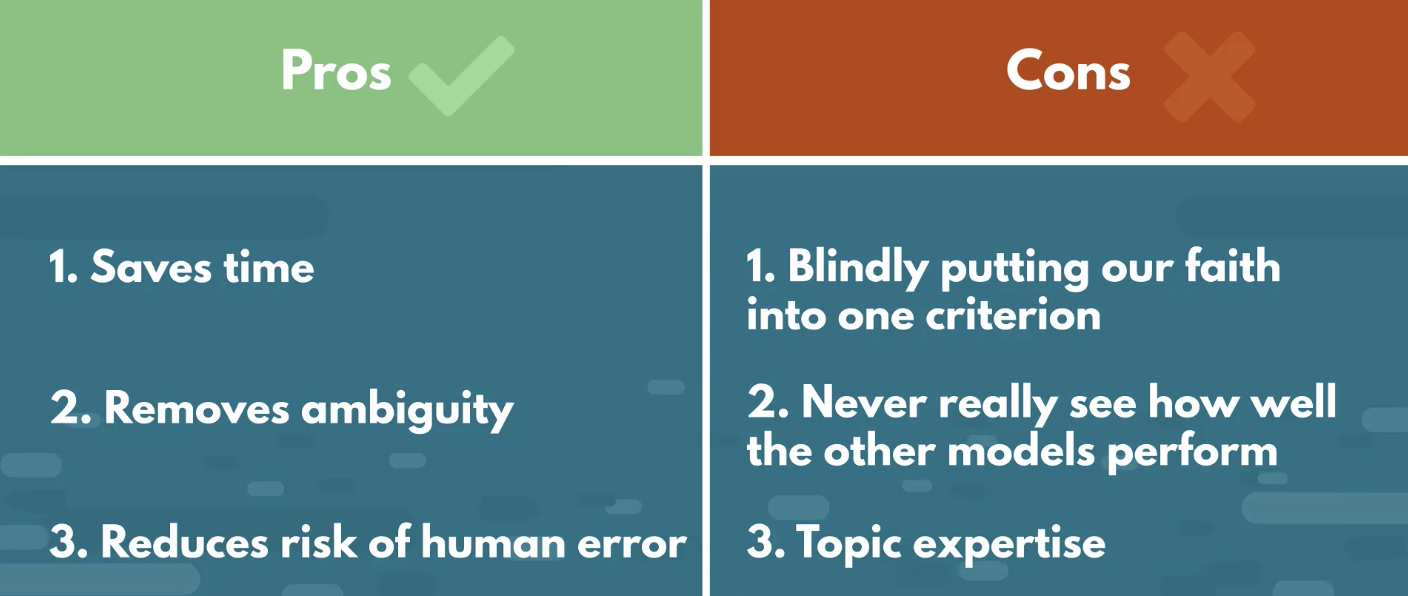